# GalMag - A Python tool for computing realistic galactic magnetic fields #

Welcome to the GalMag tutorial and basic usage guide.

### Quick start ###

The code uses an object named  [`B_field`](http://galmag.readthedocs.io/en/latest/galmag.html#galmag.B_field.B_field) to store all the magnetic field information.

Associated with this, there is a coordinate grid which has to be set up at the time of the 
`B_field` initialization.

In [1]:
%pylab inline


import galmag
from galmag.B_field import B_field
from pylab import *

# Maximum and minimum values of the coordinates for each direction
box_limits = [[-15, 15],[-15, 15],[-15, 15]] # kpc
box_resolution = [100,100,100]

B = B_field(box_limits, box_resolution)

Populating the interactive namespace from numpy and matplotlib


The grid - which is an uniform cartesian grid in the default case - can be accessed through the attribute `B_field.grid`. 

This attribute contains a Grid object, which itself contains [distributed data objects](https://gitlab.mpcdf.mpg.de/ift/D2O) (or d2o's, which are basically *parallelizable* [numpy](http://www.numpy.org/) arrays) in the coordinate attributes `x`, `y`, `z`, `r_cylindrical`, `r_spherical`, `theta` and `phi`. 

The coordinate systems place the galactic mid-plane at $z=0$, $\theta = \pi/2$.

In [2]:
# Example access to the coordinate grid
print 'r_cylindrical type:',type(B.grid.r_spherical)
print 'r_cylindrical-grid shape:', B.grid.r_cylindrical.shape

r_cylindrical type: <class 'd2o.distributed_data_object.distributed_data_object'>
r_cylindrical-grid shape: (100, 100, 100)


Once the `B_field` object is initialized, one can add a __disk field__ component. 
One can do this by specifying
1. The strength of $B_\phi$ (the azimutal component of the magnetic field) 
   at the solar radius (on the midplade),
2. The positions of the field reversals (the code will try to find solutions
   with *at least* these reversals, but there can be more of them),
3. The minimum number of modes to be used for this.

Itens 1 and 3 are actually optional: if absent, a strength of $-3\,\mu{\rm G}$ is
assumed for the $\phi$ component at the solar radius. There are, of course,
many other parameters involved in this calculation which for now are kept with
their default values.

The following code snippet exemplifies the use of `B_field.add_disk_field` method.

In [3]:
reversals_positions = [4.7,12.25] # Requires 2 reversals at 4.1 kpc and 12.25
B_phi_solar_radius = -3 # muG 
number_of_modes = 3

B.add_disk_field(reversals=reversals_positions, 
                 B_phi_solar_radius=B_phi_solar_radius,
                 number_of_modes=number_of_modes)

One can also include a __halo field__, using the `B_field.add_halo_field` method. 

Here we keep all the parameters with their standard values and choose to use only 
adjust the value of $B_{\phi, {\rm halo}}$ at a reference position which roughly 
corresponds to the position of the Sun in the Galaxy.

In [4]:
Bphi_sun = 0.1 # muG at the Sun's position

B.add_halo_field(halo_ref_Bphi=Bphi_sun)

Now the galactic magnetic field has been computed and is stored in the `B_field` object. 
Specific field components can be accessed in the same way as grid components were
accessed. The following snippet exemplifies this showing the $x$-depence of $B_\phi$. 

/home/nlfsr/.local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/nlfsr/.local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


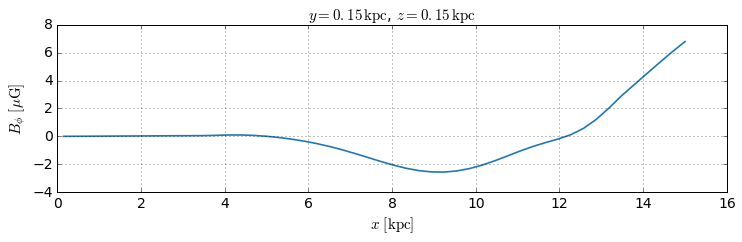

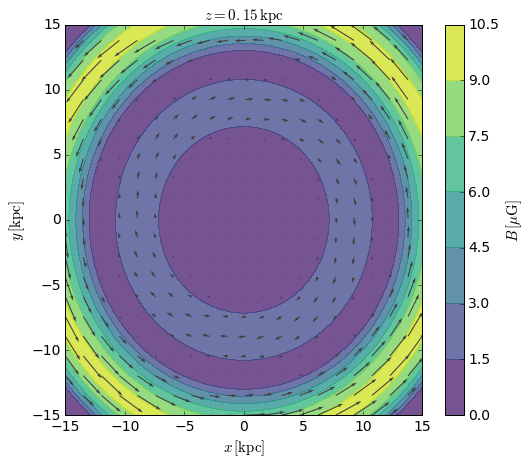

In [5]:
x = array(B.grid.x[50:,50,50]) # The conversion into a numpy array is sometimes
Bphi = array(B.phi[50:,50,50]) # required to make matplotlib work properly.
y = B.grid.x[50,50,50]
z = B.grid.x[50,50,50]

from galmag.analysis.visualization import plot_x_y_uniform, plot_x_z_uniform, plot_y_z_uniform, std_setup
std_setup() # Sets matplotlib's rc parameters (fonts, colors, sizes, etc)

figure(figsize=(12,3))
title(r'$y={0:.2f}\,\rm kpc$, $z={1:.2f}\,\rm kpc$'.format(y,z))
plot(x, Bphi, )
xlabel(r'$x\,\,[{\rm kpc}]$')
ylabel(r'$B_\phi\,\,[\mu{\rm G}]$')
grid()

figure(figsize=(8,7))
title(r'$z={0:.2f} \,\rm kpc$'.format(z))
plot_x_y_uniform(B.disk, iz=50, field_lines=False)
show()

Obs. Note that the slicing used to create the previous plot exploits the fact that the indices in the cartesian follow the coordinates (i.e. the first index corresponds to $x$, the second to $y$ and the third to $z$). 

__Separate__ field information can be accessed at any point through the attributes 
`B_field.disk` and `B_field.halo`. For example, it is possible to plot the
$x$-dependence of the halo field in the following way.

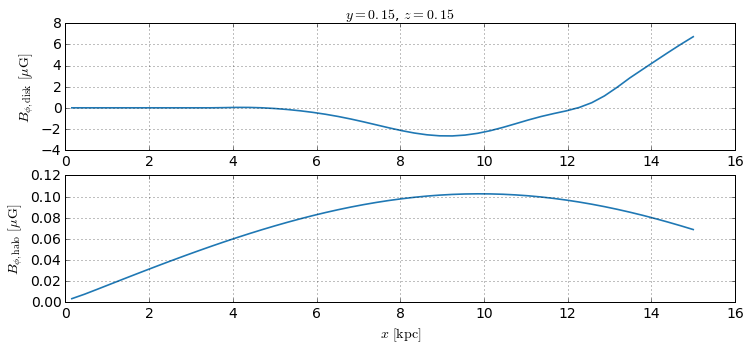

In [6]:
x = array(B.grid.x[50:,50,50])
Bphi_halo = array(B.halo.phi[50:,50,50])
Bphi_disk = array(B.disk.phi[50:,50,50])
y = B.grid.x[50,50,50]
z = B.grid.x[50,50,50]

figure(figsize=(12,5))

subplot(2,1,1)
title('$y={0:.2f}$, $z={1:.2f}$'.format(y,z), fontsize=14)
plot(x, Bphi_disk, )
ylabel(r'$B_{\phi,\rm disk}\,\,[\mu{\rm G}]$', fontsize=14)
grid()

subplot(2,1,2)
plot(x, Bphi_halo, )
xlabel(r'$x\,\,[{\rm kpc}]$', fontsize=14)
ylabel(r'$B_{\phi,\rm halo}\,\,[\mu{\rm G}]$', fontsize=14)
grid()
show()

All the used __parameters__ can be accessed at any point through the 
`parameters` attribute, which contain a dictionary.

In [7]:
B.parameters

{'disk_dynamo_number': -7.31252,
 'disk_field_decay': True,
 'disk_height': 0.4,
 'disk_height_function': <function galmag.disk_profiles.exponential_scale_height>,
 'disk_modes_normalization': array([-0.40503386,  2.24802348, -1.1838961 ]),
 'disk_radius': 20,
 'disk_rotation_function': <function galmag.disk_profiles.Clemens_Milky_Way_rotation_curve>,
 'disk_shear_function': <function galmag.disk_profiles.Clemens_Milky_Way_shear_rate>,
 'disk_turbulent_induction': 0.39,
 'halo_Galerkin_ngrid': 501,
 'halo_alpha_function': <function galmag.halo_profiles.simple_alpha>,
 'halo_compute_only_one_quadrant': True,
 'halo_do_not_normalize': False,
 'halo_dynamo_type': 'alpha2-omega',
 'halo_field_coefficients': array([-0.07420294, -0.98336166, -0.00753405,  0.16564121]),
 'halo_field_growth_rate': (-9.7962454151650746+0j),
 'halo_growing_mode_only': False,
 'halo_manually_specified_coefficients': None,
 'halo_n_free_decay_modes': 4,
 'halo_radius': 20.0,
 'halo_ref_Bphi': 0.1,
 'halo_ref_radiu

All the parameter names can be used as keyword arguments for the methods 
`add_disk_field` and `add_halo_field` previously shown.

Also, it is possible (and preferable) to access separately the parameters associated with
a specific component -- i.e. halo or disc. 

In [8]:
B.disk.parameters

{'disk_dynamo_number': -7.31252,
 'disk_field_decay': True,
 'disk_height': 0.4,
 'disk_height_function': <function galmag.disk_profiles.exponential_scale_height>,
 'disk_modes_normalization': array([-0.40503386,  2.24802348, -1.1838961 ]),
 'disk_radius': 20,
 'disk_rotation_function': <function galmag.disk_profiles.Clemens_Milky_Way_rotation_curve>,
 'disk_shear_function': <function galmag.disk_profiles.Clemens_Milky_Way_shear_rate>,
 'disk_turbulent_induction': 0.39,
 'solar_radius': 8.5}

(*This is actually safer than just using `B_field.parameters`*)

## Grid object ##

All the calculations are done on top of a coordinate grid, which is stored as 
a [`Grid`](http://galmag.readthedocs.io/en/latest/galmag.html#galmag.Grid.Grid) object. This class can be directly accessed from the module `Grid`, 
and instantiated using a similar syntax as the one used for the `B_field`.

In [9]:
from galmag.Grid import Grid

# A cartesian grid can be constructed as follows
cartesian_grid = Grid(box=[[-15, 15],[-15, 15],[-15, 15]],
                      resolution = [12,12,12],
                      grid_type = 'cartesian' # Optional
                      )
# For cylindrical grid, the limits are specified assuming 
# the order: r, theta, phi (where the last is the azimuth)
cylindrical_grid = Grid(box=[[0.25, 15],[-pi,pi],[-15,15]],
                      resolution = [9,12,9],
                      grid_type = 'cylindrical')

# For spherical grid, the limits are specified assuming 
# the order: r, phi, z
spherical_grid = Grid(box=[[0, 15],[0, pi], [-pi,pi],],
                      resolution = [12,10,10],
                      grid_type = 'spherical')

The geometry of the different grids can be easily understood from 
the following plot (note the automatic conversion to cartesian 
coordinates through the attributes `x`, `y`, `z`).

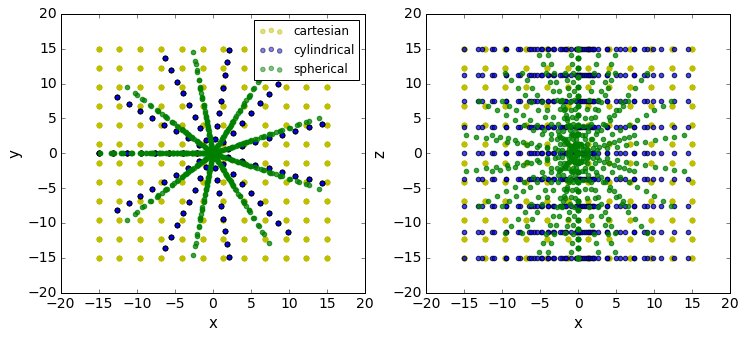

In [10]:
figure(figsize=(12,5))
subplot(1,2,1)
scatter(cartesian_grid.x, cartesian_grid.y, color='y', label='cartesian', alpha=0.5)
scatter(cylindrical_grid.x, cylindrical_grid.y, label='cylindrical', alpha=0.5)
scatter(spherical_grid.x, spherical_grid.y, color='g', label='spherical', alpha=0.5)
xlabel('x'); ylabel('y')
legend()
subplot(1,2,2)
scatter(cartesian_grid.x, cartesian_grid.z, color='y', alpha=0.5)
scatter(cylindrical_grid.x, cylindrical_grid.z, alpha=0.5)
scatter(spherical_grid.x, spherical_grid.z, color='g', alpha=0.5)
xlabel('x'); ylabel('z')
show()

## Disc field ##

The disc field in GalMag is constructed by expanding the dynamo solution (associated 
with a given choice of parameters) in a series of modes and assigning an adequate 
choice of coefficients $C_n\!$'s to the $n$ dominant modes.

### Direct choice of normalizations ###

The choice of the $C_n$' can be done explicitly setting up the parameter 
`disk_modes_normalization`, which should contain an array of coefficients.
Each mode is pre-normalized so that its absoluted value at a reference 
cylindrical radius is unit, i.e. $| \mathbf{B}_{\rm mode}(R_{\rm ref},0,0)|=1$.
$R_{\rm ref}$ is set by the parameter  `disk_ref_r_cylindrical`, whose default
value is $8.5\,{\rm kpc}$, roughly the sun's radius.

To exemplify this, we will generate a new `B_field` object based on
an uniform cylindrical grid and add to it a disc magnetic field
corresponding to the second mode only.

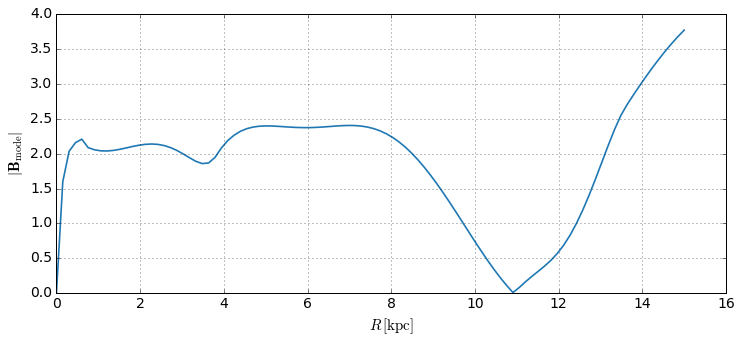

In [11]:
figure(figsize=(12,5))
box_limits = [[1e-8, 15],# r [kpc]
              [0,0], # phi
              [0,0]] # z [kpc]
box_resolution = [100,1,1] # No phi or z variation
Bcyl = B_field(box_limits, box_resolution, grid_type='cylindrical')

Bcyl.add_disk_field(disk_modes_normalization=[0,2]) # Skips first mode, normalization 2 for the second mode

y = sqrt(Bcyl.r_cylindrical[:,0,0]**2 + Bcyl.phi[:,0,0]**2 +Bcyl.z[:,0,0]**2)
x = array(Bcyl.grid.r_cylindrical[:,0,0])
plot(x,y)
ylabel(r'$| \mathbf{B}_{\rm mode}|$')
xlabel(r'$R\,[{\rm kpc}]$')
grid()
show()

(*The strong - possibly unphysical - peak in the centre is produced by the shape of the assumed rotational
shear profile. The reader/user is advised to experiment with different shear profiles.*)

For a more interesting application, let us examine how $B_\phi$ components of the different modes behave.

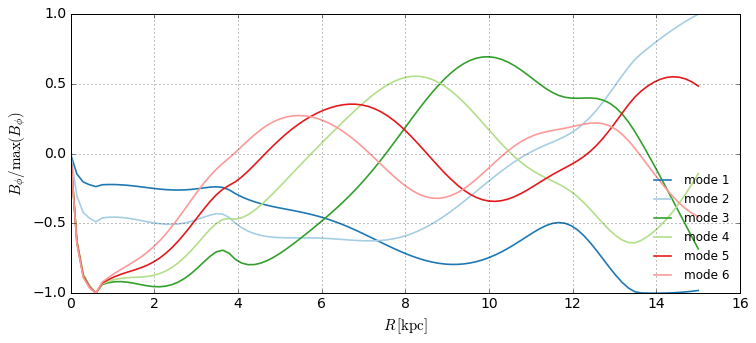

In [12]:
figure(figsize=(12,5))
box_limits = [[1e-8, 15],# r [kpc]
              [0,0], # phi
              [0,0]] # z [kpc]
box_resolution = [100,1,1] # No phi or z variation
Bcyl = B_field(box_limits, box_resolution, grid_type='cylindrical')

nmodes = 6

for i in range(nmodes):
    mode_norm = zeros((i+1))
    mode_norm[i]=1
    
    # Overwrites the disk field with another mode
    Bcyl.add_disk_field(disk_modes_normalization=mode_norm)
    
    x = array(Bcyl.grid.r_cylindrical[:,0,0])
    y = array(Bcyl.phi[:,0,0])
    plot(x,y/abs(y).max(), label='mode {}'.format(i+1))
    ylabel(r'$B_\phi/\max(B_\phi)$')
    xlabel(r'$R\,[{\rm kpc}]$')
legend(loc='lower right', frameon=False)
grid()
show()

### Reversals ###

As it was discussed in the _Quick Start_ section, the disk field can be 
constructed by specifying the position of the magnetic field reversals
(positions $R_{\rm rev}$ along the mid-plane where $B_\phi$ changes sign), 
the strength of the field at a reference point (generally 
$R_{\rm Sun}\approx 8.5\,{\rm kpc}$) and the number of modes to be used.

This is done using a *least squares method* to find the choice of $C_n$'s
which offers best fit to these constraints. It is worth noting that such
solution is not necessarily unique and, for some special cases, may not 
be exact. 

Thus, while this is a good tool for the quick generation of examples, the 
user should use it carefully.

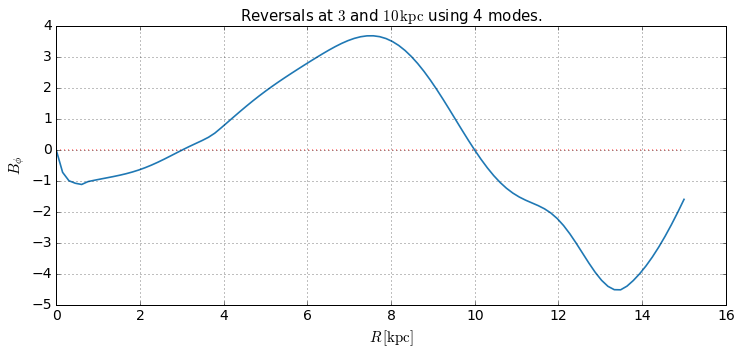

In [13]:
figure(figsize=(12,5))
reversals_positions = [3,10] 
B_phi_solar_radius = 3 # muG 
number_of_modes = 4

Bcyl.add_disk_field(reversals=reversals_positions, 
                 B_phi_solar_radius=B_phi_solar_radius,
                 number_of_modes=number_of_modes)

y = array(Bcyl.phi[:,0,0])
x = array(Bcyl.grid.r_cylindrical[:,0,0])
title(r'Reversals at $3$ and $10\,\rm kpc$ using 4 modes.')
plot(x,x*0, 'r:', alpha=0.5)
plot(x,y)
ylabel(r'$B_\phi$')
xlabel(r'$R\,[{\rm kpc}]$')
grid()
show()

GalMag's choice of $C_n$'s can found in the parameters dictionary.

In [14]:
Bcyl.parameters

{'disk_dynamo_number': -7.31252,
 'disk_field_decay': True,
 'disk_height': 0.4,
 'disk_height_function': <function galmag.disk_profiles.exponential_scale_height>,
 'disk_modes_normalization': array([-0.13157106, -1.29951539, -0.74702717,  2.34282644]),
 'disk_radius': 20,
 'disk_rotation_function': <function galmag.disk_profiles.Clemens_Milky_Way_rotation_curve>,
 'disk_shear_function': <function galmag.disk_profiles.Clemens_Milky_Way_shear_rate>,
 'disk_turbulent_induction': 0.39,
 'solar_radius': 8.5}

### Disc parameters ###

The following parameters control the disc magnetic field:


1. `disk_dynamo_number` - Default: -20. 

   Dynamo number, $D= R_\omega R_\alpha$, associated with the disc component. 
   
   .
   
2. `disk_field_decay` - Default: True

   Sets behaviour for $|z|>h(R)$. If `True`, the field will decay 
   with $|z|^{-3}$, otherwise, the field will be assumed to be constant.
   
   .
   
3. `disk_height` - Default: 0.4 $[\rm kpc ]$,

    Disc height at the solar radius, $h_\odot$.

    .
4. `disk_height_function` - Default: `gmf_tool.disk_profiles.exponential_scale_height`
    
    Disc height as a function of the cylindrical radius, $h(R)$. The default function 
    corresponds to an exponential disc. A function of a constant height disc can be found in
    `gmf_tool.disk_profiles.constant_scale_height`
    
    .
5. `disk_modes_normalization`.
    
    An n-array containing the the coefficients of the first n modes
    (see Direct choice of normalizations section).
    
    .
6. `disk_radius` - Default: 20 $[\rm kpc]$
    
    Radius of the dynamo active region of the disc.
    
    .
7. `disk_rotation_function` - Default: `gmf_tool.disk_profiles.Clemens_Milky_Way_rotation_curve`

    Rotation curve of the disc. By default, assumes the rotation curve obtained 
    by Clemens (1985). One alternative, mostly for testing is
    gmf_tool.disk_profiles.solid_body_rotation_curve.   
    
    .
8. `disk_shear_function` - Default:  `gmf_tool.disk_profiles.Clemens_Milky_Way_shear_rate`

    Shear rate as a function of the cylindrical radius of the disc. 
    By default, assumes a shear rate compatible with the rotation 
    curve obtained by Clemens (1985). Also available is (again, mostly
    for testing) is a constant shear profile:
    gmf_tool.disk_profiles.constant_shear_rate   
    
    .
9. `disk_turbulent_induction`: 0.6,

    Dimensionless intensity of helical turbulence, $R_\alpha$.
    
    .
10. `solar_radius`: 8.5 $[\rm kpc]$
    
    Cylindar radius corresponding to the Sun's position, $R_\odot$. 
    This is used both for the normalization of the magnetic field and for the normalization
    of the height profile.

.


## Halo field ##

To specify the halo field, one chooses the field strength at a 
reference position, whether the field is symmetric or anti-symmetric
and the number of free-decay modes used to construct the solution.
All these (and other parameters listed later) can be used as arguments
for the `B_field.add_halo_field` method.

Generally, more than one solution is found for a given set of parameters.
The `B_field.add_halo_field` method will include the one with the 
*largest growth rate*.


It is possible to access the __growth/decay rate__ of the solution found 
through the attribute `B_field_component.growth_rate`. 

Similarly, the coefficients used can be accessed using `B_field_component.coefficients`.

In [15]:
# Using the previously defined B object
B.add_halo_field(
    # Number of free decay modes to be used in the Galerkin expansion
    halo_n_free_decay_modes = 4,
    # cylindrical radius of the reference point
    halo_ref_radius = 9,
    # z coordinate of the reference point
    halo_ref_z = 0.02,
    # B_phi value at the reference point
    halo_ref_Bphi = 4.1, # [muG]
    # Chooses between symmetric and anti-symmetric solution
    halo_symmetric_field = True # Symmetric
    )

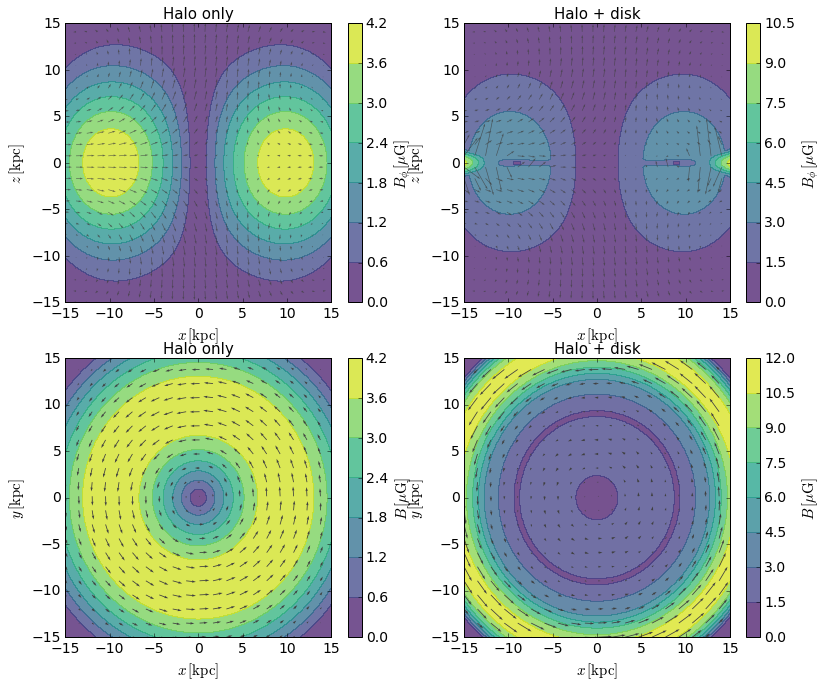

In [16]:
figure(figsize=(13.1,11))
subplot(2,2,1)
title('Halo only')
plot_x_z_uniform(B.halo, skipx=4,skipz=4, iy=49)
subplot(2,2,2)
title('Halo + disk')
plot_x_z_uniform(B, skipx=4,skipz=4, iy=49)
subplot(2,2,3)
title('Halo only')
plot_x_y_uniform(B.halo, skipy=5,skipx=5, iz=49, field_lines=False)
subplot(2,2,4)
title('Halo + disk')
plot_x_y_uniform(B, skipy=5,skipx=5, iz=49, field_lines=False)
show()

In [17]:
print 'Growth rate: ', B.halo.growth_rate
print 'Coefficientes: ', B.halo.coefficients
B.halo.parameters

Growth rate:  (-9.79624541517+0j)
Coefficientes:  [-0.07420294 -0.98336166 -0.00753405  0.16564121]


{'halo_Galerkin_ngrid': 501,
 'halo_alpha_function': <function galmag.halo_profiles.simple_alpha>,
 'halo_compute_only_one_quadrant': True,
 'halo_do_not_normalize': False,
 'halo_dynamo_type': 'alpha2-omega',
 'halo_field_coefficients': array([-0.07420294, -0.98336166, -0.00753405,  0.16564121]),
 'halo_field_growth_rate': (-9.7962454151650746+0j),
 'halo_growing_mode_only': False,
 'halo_manually_specified_coefficients': None,
 'halo_n_free_decay_modes': 4,
 'halo_radius': 20.0,
 'halo_ref_Bphi': 4.1,
 'halo_ref_radius': 9,
 'halo_ref_z': 0.02,
 'halo_rotation_characteristic_height': 1000,
 'halo_rotation_characteristic_radius': 3.0,
 'halo_rotation_function': <function galmag.halo_profiles.simple_V>,
 'halo_rotation_induction': 200.0,
 'halo_symmetric_field': True,
 'halo_turbulent_induction': 0.6}

### Galerkin expansion coefficients ###

It is likely that one may want to study directly which choices of parameters
lead to which growth rates. This can be done using the module `gmf_tool.galerkin`,
which contains the function `Galerkin_expansion_coefficients`.

In [18]:
from galmag.galerkin import Galerkin_expansion_coefficients

The function requires a dictionary containing the following parameters (described individually in the comments):

In [19]:
p = { # Square root of the number of grid points used in the calculations
      'halo_Galerkin_ngrid': 500,
      # Function specifying the alpha profile of the halo
      'halo_alpha_function': galmag.halo_profiles.simple_alpha,
      # R_\alpha 
      'halo_turbulent_induction': 7.7,
      # R_\omega
     'halo_rotation_induction': 200.0,
      # Number of free decay modes to be used for the expansion
     'halo_n_free_decay_modes': 4,
      # Whether the field is symmetric or antisymmetric 
      'halo_symmetric_field': True,
      # Defines the dynamo type
      'halo_dynamo_type': 'alpha-omega',
      # Function specifying the rotation curve of the halo
      'halo_rotation_function': galmag.halo_profiles.simple_V,
      # Parameters used in this function 
      'halo_rotation_characteristic_height': 1e3,
      'halo_rotation_characteristic_radius': 3.0,
      # Halo radius
      'halo_radius': 20.,
     }

The function returns the growth rates and the coefficients, $a_i$ of the free decay modes.
Optionally, the intermediate matrix 
      $W_{ij} = \int \mathbf{B_j} \cdot \hat{W} \,\mathbf{B_i}$ is 

In [20]:
vals, vecs, Wij = Galerkin_expansion_coefficients(p, return_matrix=True)

In [21]:
print 'The resultant matrix is:\n', Wij
print
for i, (val, vec) in enumerate(zip(vals, vecs)):
    print '\nSolution ',i
    print ' Growth rate =', val
    for i, c in enumerate(vec):
        print '    a{0} = {1}'.format(i+1, c)

The resultant matrix is:
[[ -2.01907286e+01   1.25796099e+01   1.98749004e+01   1.49625781e+01]
 [  1.38173626e+02  -2.01907286e+01  -1.12128204e+01   0.00000000e+00]
 [ -7.44567493e+00   1.69964882e-03  -4.88311936e+01  -2.27554778e+01]
 [ -7.28474496e+01   0.00000000e+00  -1.54550795e+02  -4.88311936e+01]]


Solution  0
 Growth rate = (-82.5413159253+9.73408942049j)
    a1 = (-0.330455866513+0.0459339957737j)
    a2 = (-0.330455866513-0.0459339957737j)
    a3 = (0.195543470913+0.0392729862923j)
    a4 = (0.195543470913-0.0392729862923j)

Solution  1
 Growth rate = (-82.5413159253-9.73408942049j)
    a1 = (0.772897984614+0j)
    a2 = (0.772897984614-0j)
    a3 = (0.778273486463+0j)
    a4 = (0.778273486463-0j)

Solution  2
 Growth rate = (13.5193937253+9.58533336905j)
    a1 = (0.225666516343-0.104932685324j)
    a2 = (0.225666516343+0.104932685324j)
    a3 = (0.0698536066298-0.181356682277j)
    a4 = (0.0698536066298+0.181356682277j)

Solution  3
 Growth rate = (13.5193937253-9.58533

### Halo parameters ###
   .
   
2. `halo_Galerkin_ngrid`   
    Number of grid points used for the Galerkin expansion calculations.
    
    .
   
2. `halo_alpha_function` -  Default: `gmf_tool.halo_profiles.simple_alpha`
    alpha-effect profile. By default, it is assumed simply:
    $\alpha \propto \cos(\theta)\,$.

    .
2. `halo_dynamo_type` - Default: `'alpha-omega'`

    Chooses the dominant type of dynamo. Available options:
    `'alpha-omega'` and `'alpha2-omega'`.

    .
2. `halo_growing_mode_only` - Default: `False`.

    If true, returns a zero field if all modes are decaying for 
    a particular choice of parameters. 
    
    .
2. `halo_n_free_decay_modes` - Default: `4`

    Number of free decay modes to be used for the Galerkin expansion.
    Currently, only the first 4 free decay modes of each symmetry
    (symmetric or anti-symmetric) are available.

    .
2. `halo_radius` - Default: 20 [${\rm kpc}$]
    
    Radius of the dynamo active region of the halo.

    .   
2. `halo_ref_Bphi` - Default: 0.1 [${\mu\rm G}$]
    
    Strength of the halo magnetic field at the halo reference point.
    
    .
2. `halo_ref_radius` - Default: 8.5 [${\rm kpc}$]
    
    Cylindrical radius of the halo reference point.
    
    .
2. `halo_ref_z` - Default: 0.02 [${\rm kpc}$]
    
    z-coordinate of the halo reference point.
    
    .   
2. `halo_rotation_function` -  Default: `gmf_tool.halo_profiles.simple_V`

    Rotation curve of the halo. By default a simple rotation 
    curve with no z dependence,  exponentially decaying with 
    the cylindrical radius, is assumed.
    
    .
2. `halo_rotation_induction` - Default: 200
    
    Dimensionless induction by differential rotation, $R_\omega$, for 
    the halo.
    
    .   
2. `halo_symmetric_field` - Default: `True`
    
    If True, the field is assumed to be symmetric over the midplane.
    If False, it is assumed to be anti-symmetric.
   
    .
2. `halo_turbulent_induction`: 0.6

    Dimensionless intensity of helical turbulence, $R_\alpha$, 
    for the halo.

    

## Plotting tools ##

GalMag comes with a small selection of plotting tools, particularly to facilitate 
the preparation of 2D slices for diagnostic. These can be found in the 
`galmag.analysis.visualization` module.

In [22]:
help(galmag.analysis.visualization)

Help on module galmag.analysis.visualization in galmag.analysis:

NAME
    galmag.analysis.visualization

FILE
    /data/nlfsr/Dropbox/Code/GMF/galmag/analysis/visualization.py

FUNCTIONS
    plot_r_z_uniform(B, skipr=3, skipz=5, quiver=True, contour=True, quiver_color='0.25', cmap='viridis', vmin=None, vmax=None, **kwargs)
        Plots a r-z slice of the field. Assumes B is created using a cylindrical
        grid - for a more sophisticated/flexible plotting script which does not
        rely on the grid structure check the plot_slice.
        
        The plot consists of:
          1) a coloured contourplot of B_\phi
          2) quivers showing the x-z projection of the field
        
        Input:
          B -> a B_field or B_field_component object
          quiver, contour -> booleans controlling which type of plot
                                          should be displayed. (Default: all True.)
          skipx, skipz -> arguments to tweak the the displaying of the
         

## Advanced ##

### Adding extra major components ###

If one explores the `B_field` object a little further, one finds 
there is a method called `B_field.set_field_component` which takes
a component name and a `B_field_component` object as inputs.

We exemplify, below, how to add an extra personalised gaussian
noise field component to our `B_field` object. 

We start by generating noisy field.

In [23]:
from galmag.util import derive

mu = 0
sigma = 0.1 / 6.43 # magic number..

# Define a random vector potential 
Anoise = {} # Dictionary of vector components
for i, c in enumerate(('x','y','z')):
    Anoise[c] = np.random.normal(mu, sigma, B.resolution.prod())
    Anoise[c] = Anoise[c].reshape(B.resolution)

# Prepares the derivatives to compute the curl
dBi_dj ={}
for i, c in enumerate(['x','y','z']):
    for j, d in enumerate(['x','y','z']):
        dj = (B.box[j,-1]-B.box[j,0])/float(B.resolution[j])
        dBi_dj[c,d] = derive(Anoise[c],dj, axis=j)

# Computes the curl of Anoise
tmpBnoise = {}        
tmpBnoise['x'] = dBi_dj['z','y'] -  dBi_dj['y','z']
tmpBnoise['y'] = dBi_dj['x','z'] -  dBi_dj['z','x']
tmpBnoise['z'] = dBi_dj['y','x'] -  dBi_dj['x','y']

del dBi_dj; del Anoise

for c in tmpBnoise:
    print 'B{0}: mean = {1}  std = {2}'.format(c, 
                                                tmpBnoise[c].mean(),
                                                tmpBnoise[c].std())

By: mean = 1.51037086194e-05  std = 0.057760155735
Bx: mean = -5.17186672266e-05  std = 0.0576617213496
Bz: mean = -1.81014992487e-05  std = 0.0576202207021


Note that the format is compatible with the grid of the previously
generated field object. 

Now, we can use these data create a `B_field_component` object. 
Note that we included the parameters used for generating the data
for future reference.

In [24]:
from galmag.B_field import B_field_component 
Bnoise_component = B_field_component(B.grid, 
                                     x=tmpBnoise['x'],
                                     y=tmpBnoise['y'],
                                     z=tmpBnoise['z'],
                                     parameters={'mu': mu, 
                                                 'sigma':sigma})
del tmpBnoise

One can now access the x,y,z vector components through
the `Bnoise_component`'s attributes.

One can also access the same information in a cylindrical or spherical coordinate system.

In [25]:
print 'A sample of Bnoise_x'
print Bnoise_component.x[1:3,1:3,1:3]
print '\nA sample of Bnoise_theta'
print Bnoise_component.theta[1:3,1:3,1:3]

A sample of Bnoise_x
[[[ 0.10540869 -0.02746686]
  [-0.05342736  0.03741246]]

 [[ 0.00723644  0.0990359 ]
  [-0.04610558  0.00992156]]]

A sample of Bnoise_theta
[[[-0.02501224 -0.13044216]
  [-0.06275861 -0.01282237]]

 [[ 0.06358862  0.01769822]
  [ 0.01315793  0.01935498]]]


Finally, one can add this component to the previously defined 
B_field object using

In [26]:
B.set_field_component('noise',Bnoise_component)

print 'Brms', (B.noise.x**2+B.noise.y**2+B.noise.z**2).mean()**0.5

Brms 0.0999059696109


Now the new component can be accessed easily using `B.noise`.

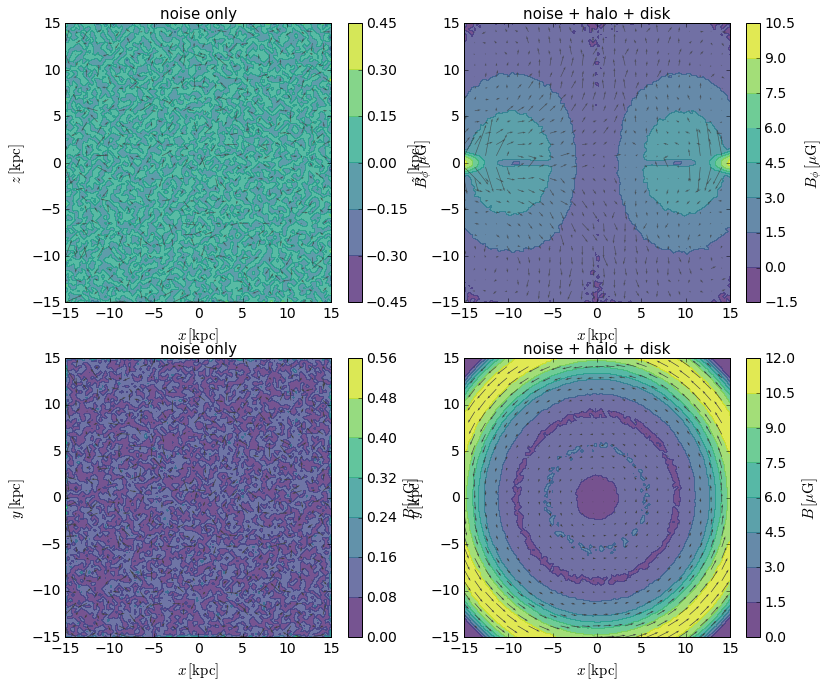

In [27]:
figure(figsize=(13.1,11))
subplot(2,2,1)
title('noise only')
plot_x_z_uniform(B.noise, skipx=4,skipz=4, iy=49)
subplot(2,2,2)
title('noise + halo + disk')
plot_x_z_uniform(B, skipx=4,skipz=4, iy=49)
subplot(2,2,3)
title('noise only')
plot_x_y_uniform(B.noise, skipy=4,skipx=4, iz=49, field_lines=False)
subplot(2,2,4)
title('noise + halo + disk')
plot_x_y_uniform(B, skipy=4,skipx=4, iz=49, field_lines=False)
show()

### Generators ###

To produce the built-in field and halo field components, a generator class is used.
The generator is actually stored in the `B_component_field` object itself. E.g.

In [28]:
B.halo.generator

All the *physics* is coded in the generator classes $-$ while the `B_field` and 
`B_field_component` classes deal only with coordinate transformations and convenience.

The reader is invited to inspect the [documentation](http://galmag.readthedocs.io/en/latest/galmag.B_generators.html#module-galmag.B_generators)  of 
`galmag.B_generators.B_generator_halo.B_generator_halo`
and 
`galmag.B_generators.B_generator_disk.B_generator_disk`
for further details on the computation of the magnetic fields.

One can use the generators directly to produce the magnetic field components 
(and then possibly include them using the `set_field_component` method). Also,
for the sake of consistency, long term inclusion of new components 
(e.g. a random/turbulent field component) should be implemented using 
similar generators.